In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

### Loading in the data

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##### The dataset has 7787 rows and 12 columns:

- show_id: unique id of each show (not much of a use for us in this notebook)  
- tpye: The category of a show, can be either a Movie or a TV Show
- title: Name of the show
- director: Name of the director(s) of the show
- cast: Name of actors and other cast of the show
- country: Name of countries the show is available to watch on Netflix
- date_added: Date when the show was added on Netflix
- release_year: Release year of the show
- rating: Show rating on netflix
- duration: Time duration of the show
- listed_in: Genre of the show
- description: Some text describing the show

#### Looking at missing data using missingno

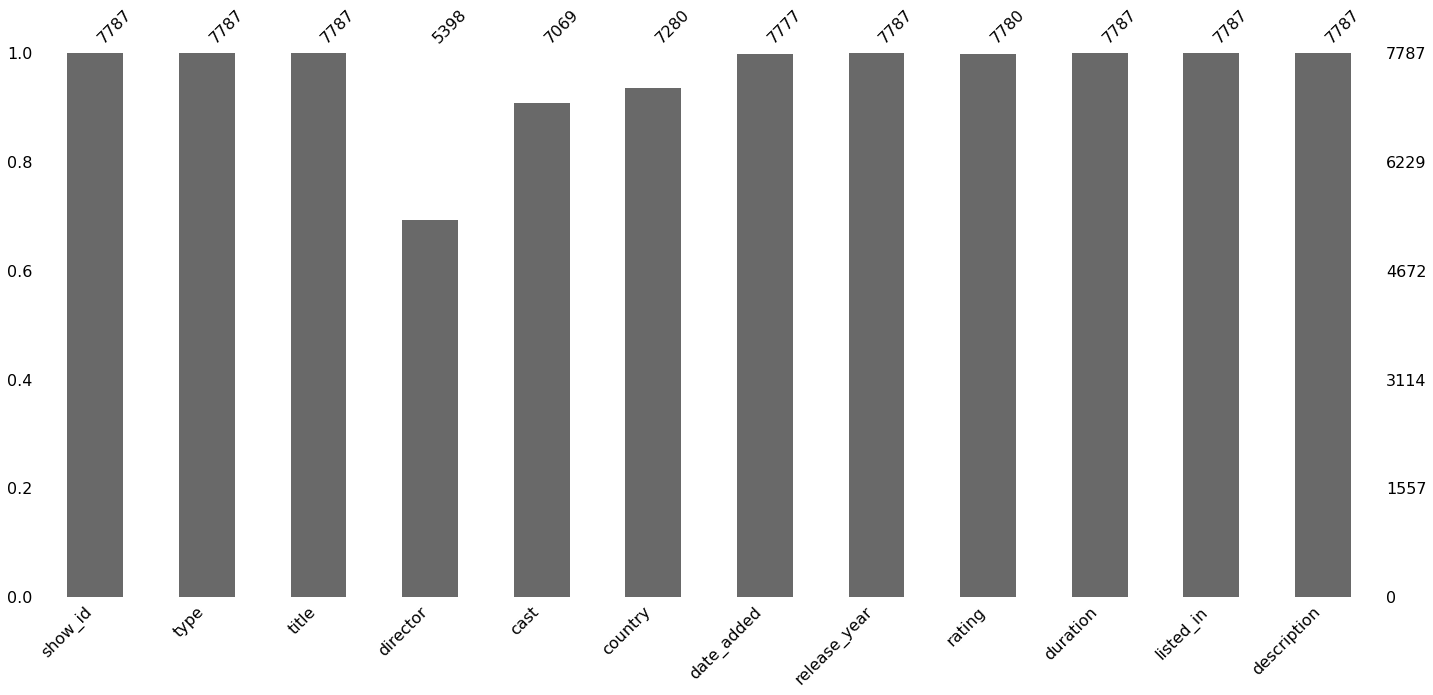

In [5]:
msno.bar(df)

We can see from the above graph that data is missing in director, cast, country, and date added. However, for date_added it is only missing 10 entries, and realease_year is missing no entries so analysis by year can still be completed. There are also 7 entries missing for rating as well.

#### Data cleaning

In [6]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Because of the nature of the information in the director and cast columns, I will be dropping them for the purpose of this analysis along with show_id & title as none of these columns add any real information for analysis.

As for rating and country, these 2 columns will provide useful inormation for analysis, so I'll have to fix them.
Rating is missing 7 entries, so this can be completed manually.
Country is missing over 500 entries so this will be handled differently.

In [8]:
df[df['rating'].isna()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year rating  duration  \
67              NaN    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

In [9]:
fillna_rating = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}
for i,j in fillna_rating.items():
    df.iloc[i, 8] = j

In [10]:
df['rating'].isna().sum()

0

In [11]:
df = df[df['date_added'].notna()]

In [12]:
df['date_added'].isna().sum()

0

##### The missing data for the date_added column is not available, so I just dropped the missing rows as it was only 10 rows it's not a big deal.

In [13]:
df['country'].value_counts()

United States                                   2549
India                                            923
United Kingdom                                   396
Japan                                            225
South Korea                                      183
                                                ... 
Spain, Canada, United States                       1
Iran, France                                       1
Norway, United States                              1
Denmark, China                                     1
India, United Kingdom, Canada, United States       1
Name: country, Length: 681, dtype: int64

We can see that most movies and TV shows are made in the USA, so to fill the missing values we can replace the NaN with the mode (USA). In addition to this we can see that some productions are available in multiple countries, however I only care about the prinicpal (first) country, so I will create a new column called main_country to store this information.

In [14]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [15]:
df['country'].isna().sum()

0

In [16]:
df['main_country'] = df['country'].apply(lambda x:x.split(',')[0])

In [17]:
df['main_country'].value_counts()

United States     3383
India              956
United Kingdom     576
Canada             259
Japan              236
                  ... 
Jamaica              1
Paraguay             1
Puerto Rico          1
Namibia              1
Mauritius            1
Name: main_country, Length: 81, dtype: int64

In [18]:
df.drop(['director','cast','title'],axis=1,inplace=True)

In [19]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
# df.loc[4323,'rating'] = 'TV-MA'

In [21]:
target_audience = {'TV-MA':'Adults','R':'Adults','PG-13':'Juvenile(T)','TV-14':'Juvenile(T)','TV-PG':'Kids','NR':'Adults',
            'TV-G':'Kids','TV-Y':'Kids','TV-Y7':'Kids','PG':'Kids','G':'Kids','NC-17':'Adults','UR':'Adults',
            'TV-Y7-FV':'Juvenile(T)','TV-Ma ':'Adults'}
df['audience']=df['rating'].replace(target_audience)
df['audience'].unique()

array(['Adults', 'Juvenile(T)', 'Kids'], dtype=object)

In [22]:
df.isna().sum()

show_id         0
type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
main_country    0
audience        0
dtype: int64

Created a new column with data for target age groups instead of ratings

In [23]:
df['type'] = pd.Categorical(df['type'])
df['audience'] = pd.Categorical(df['audience'])
df['date_added'] = pd.to_datetime(df['date_added'])

In [74]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Added two columns for year and month added to Netflix

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   category      
 2   country       7777 non-null   object        
 3   date_added    7777 non-null   datetime64[ns]
 4   release_year  7777 non-null   int64         
 5   rating        7777 non-null   object        
 6   duration      7777 non-null   object        
 7   listed_in     7777 non-null   object        
 8   description   7777 non-null   object        
 9   main_country  7777 non-null   object        
 10  audience      7777 non-null   category      
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(2), object(8)
memory usage: 744.5+ KB


### All the missing data is gone and I can begin exploring and visualizing the data further

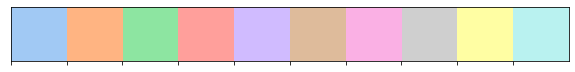

In [26]:
palette = sns.color_palette('pastel')
sns.palplot(palette)

In [27]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

### Comparison of the types of content on Netflix

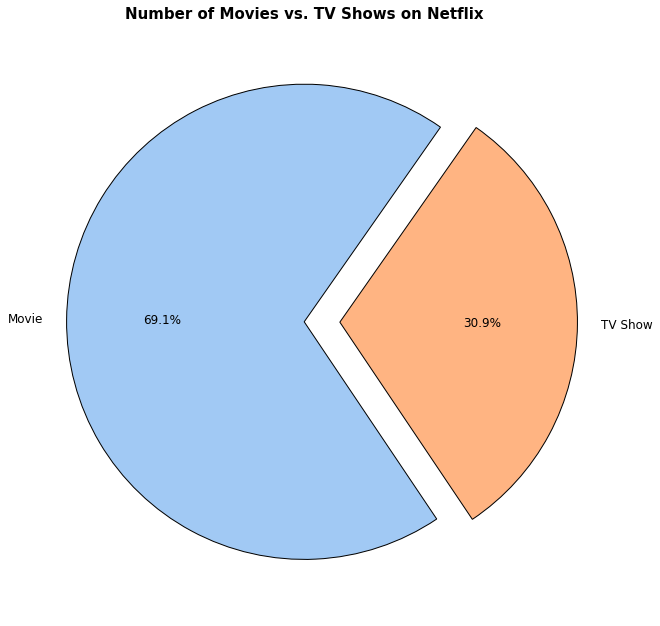

In [28]:
blue = palette[0]
orange = palette[1]
plt.pie(df['type'].value_counts().values, labels = df['type'].value_counts().index, autopct = '%1.1f%%',
        explode = [0,0.15], colors = [blue,orange],startangle=55, textprops={'fontsize':12},
        wedgeprops={'edgecolor':'black','linewidth':1})
plt.title('Number of Movies vs. TV Shows on Netflix', fontsize = 15,fontweight='bold')
plt.tight_layout()

69.1% of all content on Netflix are movies while only 30.9% are TV Shows. The reason for this could be because more movies are produced yearly than TV Shows just due to the production process for a movie is easier to justify and recuperate costs than that of TV shows.

### Looking at the distribution of content by country

In [29]:
country_dict = {}
def count_country(x):
    countries_list = x.split(', ')
    for country in countries_list:
        if country in country_dict:
            country_dict[country] += 1
        else:
            country_dict[country] = 1

In [30]:
df.loc[df['country'].notnull(),'country'].apply(count_country)

0       None
1       None
2       None
3       None
4       None
        ... 
7782    None
7783    None
7784    None
7785    None
7786    None
Name: country, Length: 7777, dtype: object

creating a dictionary to count all productions in all countries, because the country column has multiple entries seperated by a comma.

In [31]:
country_content = pd.DataFrame(data=country_dict.values(),index=country_dict.keys(),columns=['Count']).reset_index()

In [32]:
top_15_countries = country_content.sort_values('Count',ascending=False).head(15)
top_15_countries

index  Count
3    United States   3796
6            India    990
12  United Kingdom    721
16          Canada    412
21          France    349
13           Japan    286
19           Spain    215
14     South Korea    212
25         Germany    199
1           Mexico    154
24           China    147
32       Australia    143
5            Egypt    110
4           Turkey    108
23       Hong Kong    102

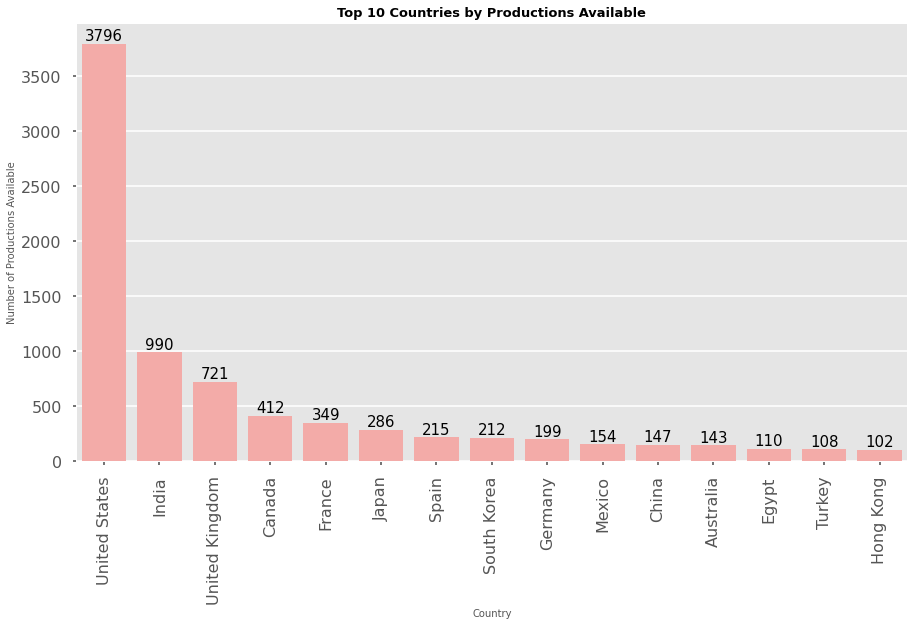

In [33]:
productions = sns.barplot(x=top_15_countries['index'].values,y=top_15_countries['Count'].values,color=palette[3])
for p in productions.patches:
        productions.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=15,color= 'black')
plt.xticks(rotation=90)
plt.xlabel('Country',fontsize=10)
plt.ylabel('Number of Productions Available',fontsize=10)
plt.title('Top 10 Countries by Productions Available',fontsize=13,fontweight='bold')
plt.tight_layout()

We can see that the USA has the most available content by far, followed by India and UK

In [34]:
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

Creating seperate dataframes for movies and tv shows to show comparisons

In [35]:
movie_ratings = movies.groupby(['rating','audience']).agg({'show_id':'count'}).reset_index()
movie_ratings = movie_ratings[movie_ratings['show_id']!= 0]
movie_ratings = movie_ratings.sort_values('audience',ascending=False)

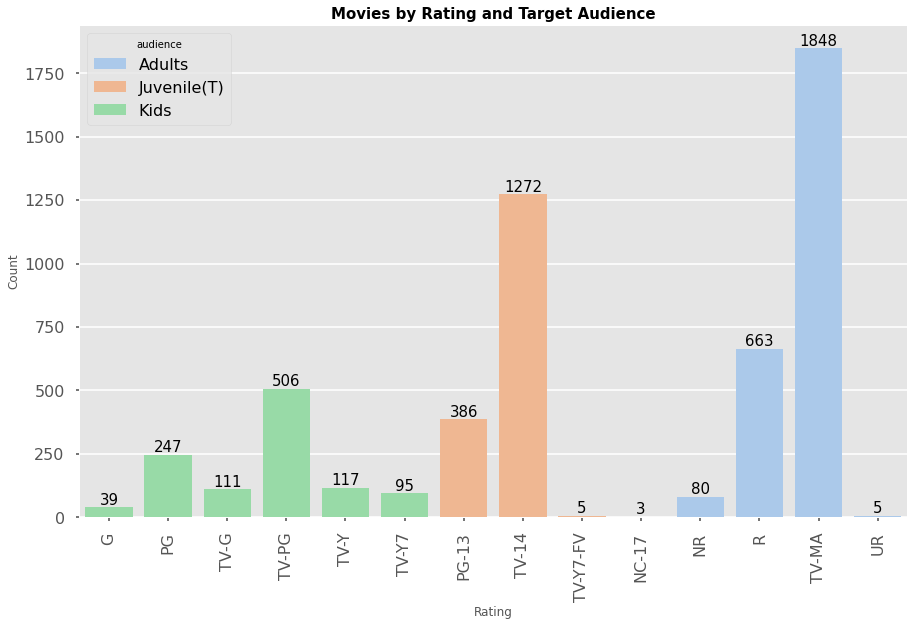

In [36]:
movies_ratings_graphs= sns.barplot(data=movie_ratings, x = 'rating', y = 'show_id',hue='audience',dodge=False,palette=palette)
for p in movies_ratings_graphs.patches:
        movies_ratings_graphs.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=15,color= 'black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Movies by Rating and Target Audience',fontsize=15,fontweight='bold')
plt.tight_layout()

A majority of movies on Netflix are made for Adults, then Teens even though there are less categories for them.

In [37]:
tv_ratings = tv_shows.groupby(['rating','audience']).agg({'show_id':'count'}).reset_index()
tv_ratings = tv_ratings[tv_ratings['show_id']!=0]
tv_ratings = tv_ratings.sort_values('audience',ascending=False)

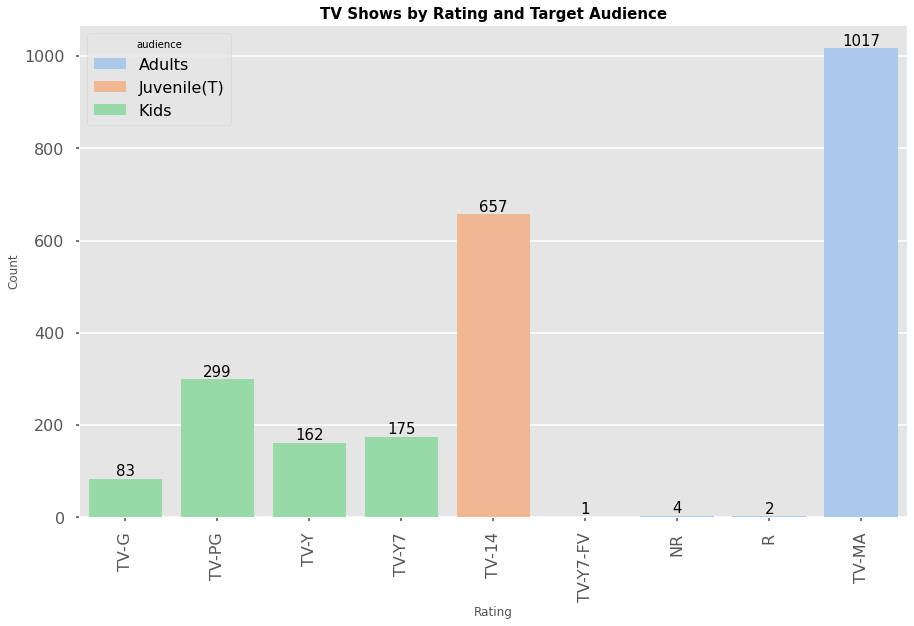

In [38]:
tv_ratings_graph = sns.barplot(data=tv_ratings, x = 'rating', y = 'show_id',hue='audience',dodge=False,palette=palette)
for p in tv_ratings_graph.patches:
        tv_ratings_graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=15,color= 'black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('TV Shows by Rating and Target Audience',fontsize=15,fontweight='bold')
plt.tight_layout()

This distribution is similar to that of the movies with most TV shows being made for adults, however it differs in the distribution for Teens and Kids. It is much more even in TV shows, with 658 shows made fore Teens, and 802 made for kids.

In [39]:
pd.options.mode.chained_assignment = None
movies.loc[:,'duration'] = pd.to_numeric(movies.loc[:,'duration'].apply(lambda x: x.replace('min','')))

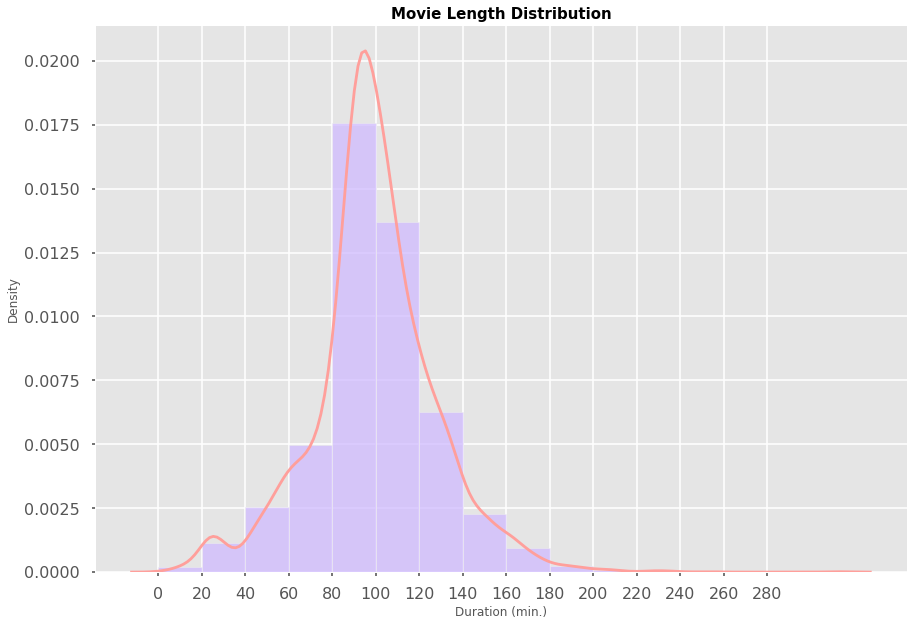

In [40]:
sns.histplot(data=movies,x='duration',bins=np.arange(0,300,20),stat='density',color=palette[4])
sns.kdeplot(data=movies['duration'],color=palette[3])
plt.xticks(ticks=np.arange(0,300,20))
plt.xlabel('Duration (min.)')
plt.title('Movie Length Distribution',fontsize=15,fontweight='bold')
plt.tight_layout()

We can see that most movies are between 80 & 100 minutes long

In [41]:
tv_shows['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2400, dtype: object

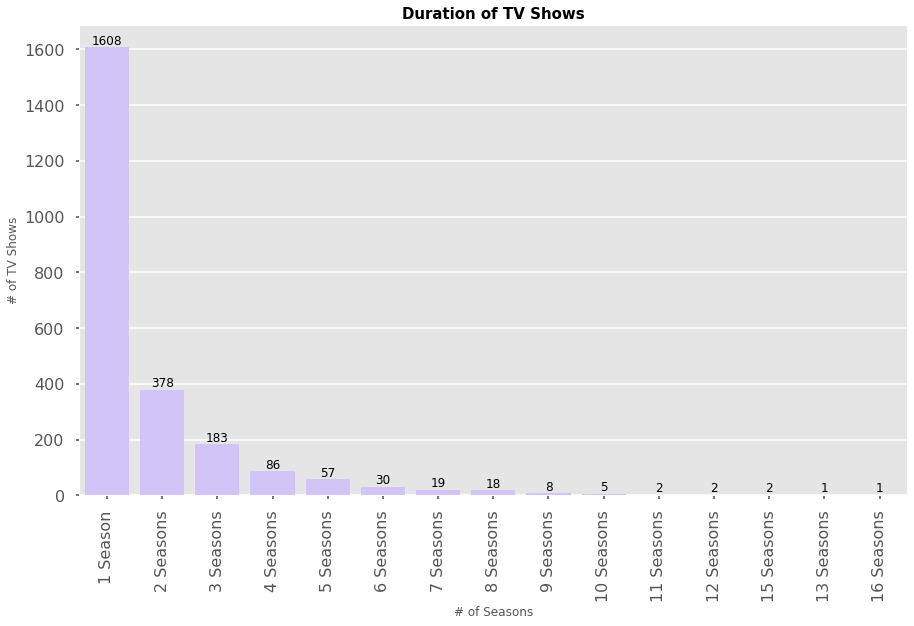

In [42]:
tv_show_length = sns.countplot(data=tv_shows,x='duration',order=tv_shows['duration'].value_counts().index,color=palette[4])
for p in tv_show_length.patches:
        tv_show_length.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=12,color= 'black')
plt.xticks(rotation=90)
plt.xlabel('# of Seasons',fontsize=12)
plt.ylabel('# of TV Shows',fontsize=12)
plt.title('Duration of TV Shows',fontsize=15,fontweight='bold')
plt.tight_layout()

We can see that most shows have a 1 season long lifespan. This can be due to many reasons such as:
- Justifying production costs is difficukt
- Continued viewership is not guaranteed
- Recuperating production costs takes a long time, and results in cancelling shows frequently

In [43]:
content_10_years = df.loc[df['year_added'] >= 2011]['year_added'].value_counts().reset_index().sort_values('index')
movies_10_years = movies.loc[movies['year_added'] >= 2011]['year_added'].value_counts().reset_index().sort_values('index')
tv_10_years = tv_shows.loc[tv_shows['year_added'] >= 2011]['year_added'].value_counts().reset_index().sort_values('index')

ax = go.Scatter(x=movies_10_years['index'],y=movies_10_years['year_added'],name='Movies',marker=dict(color=palette[1]))
ax1 = go.Scatter(x=tv_10_years['index'],y=tv_10_years['year_added'],name='TV Shows',marker=dict(color=palette[2]))
ax2 = go.Scatter(x=content_10_years['index'],y=content_10_years['year_added'],name='All Content',
                 marker = dict(color=palette[5]))
data = [ax,ax1,ax2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig=go.Figure(data,layout=layout)
fig.show()

- We can see that content addition did not really take off until around 2015
- 2019 was the year most content was added to Netflix so far
- The addition of movies is much higher than that of TV shows

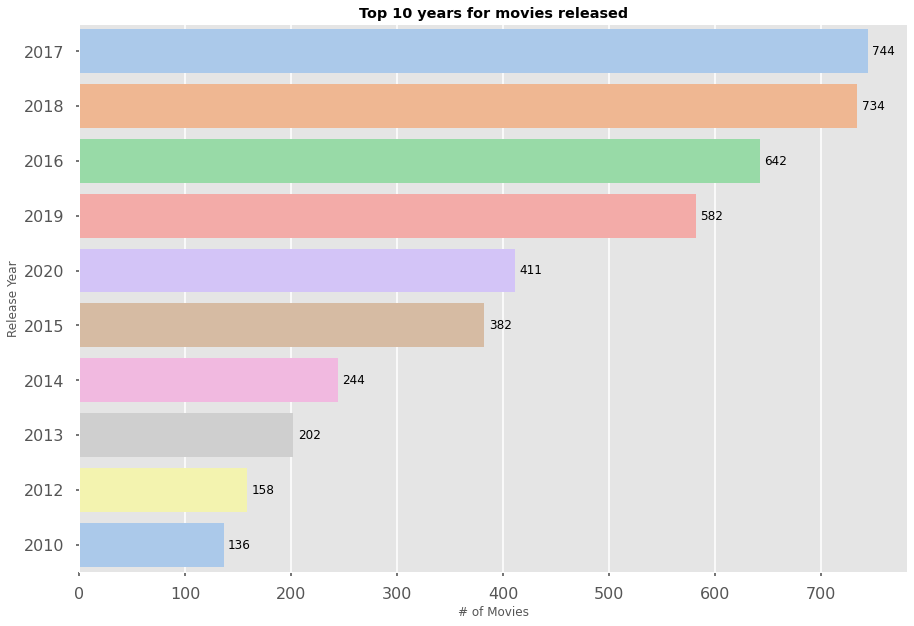

In [44]:
movies_released = sns.countplot(data=movies,y='release_year',order=movies['release_year'].value_counts().index[0:10],palette=palette[0:9])
for p in movies_released.patches:
    movies_released.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width()+15, p.get_y()+.4),ha='center',va='center',
                            color='black',fontsize=12)
plt.ylabel('Release Year')
plt.xlabel('# of Movies')
plt.title('Top 10 years for movies released',fontweight='bold')
plt.tight_layout()

We can see that the highest number of movies was released during 2017, and between 2016-2019 were the top years for releases. 2020 saw a dip in number of productions and it is safe to assume this was due to COVID signifacntly impacting production schedules.

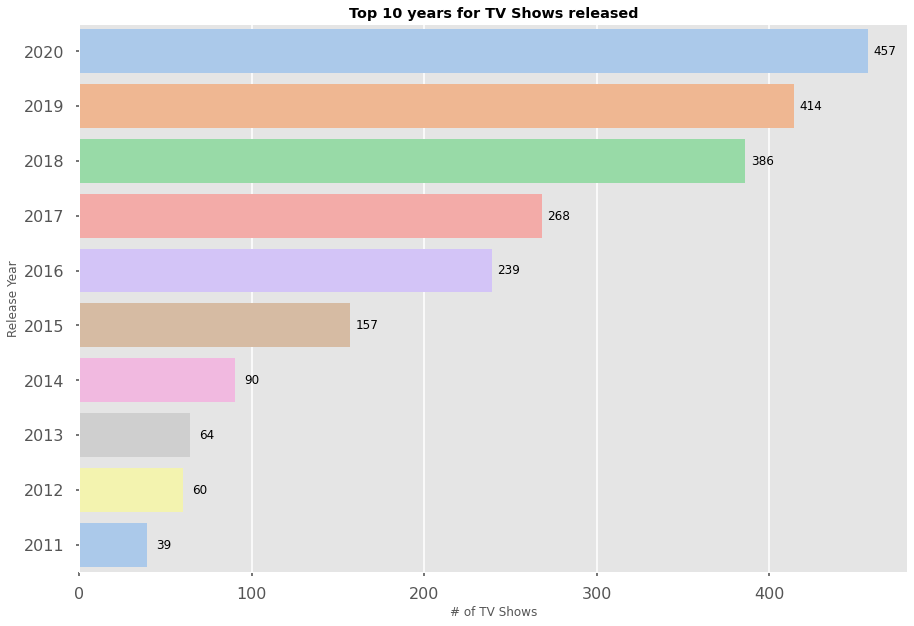

In [45]:
shows_released = sns.countplot(data=tv_shows,y='release_year',order=tv_shows['release_year'].value_counts().index[0:10],palette=palette[0:9])
for p in shows_released.patches:
    shows_released.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width()+10, p.get_y()+.4),ha='center',va='center',
                            color='black',fontsize=12)
plt.ylabel('Release Year')
plt.xlabel('# of TV Shows')
plt.title('Top 10 years for TV Shows released',fontweight='bold')
plt.tight_layout()

We can see that over the past 10 years the number of TV Shows produced has increased every year with the most being in 2020

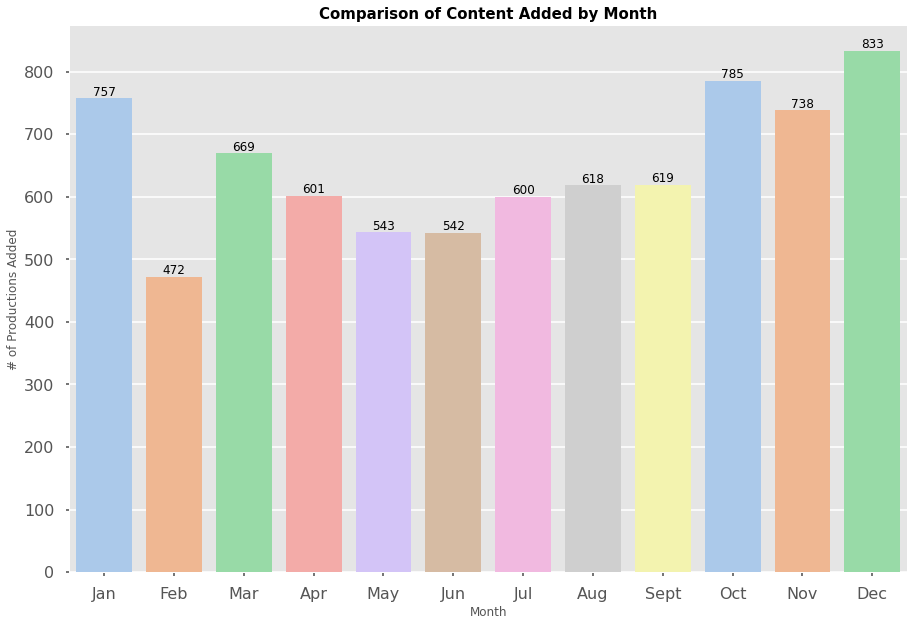

In [97]:
months_content = sns.countplot(data=df,x=df['month_added'],palette=palette[0:9])
for p in months_content.patches:
        months_content.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=12,color= 'black')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                            'Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('# of Productions Added')
plt.title('Comparison of Content Added by Month',fontsize=15,fontweight='bold')
plt.tight_layout()

We can see that Netflix adds most of its content between the months of October and January, with December having the most content added. There could be many reasons for this such as:
- Licensing specifications
- Turnover of previous content being highest during these months so to counteract that they add a lot of content
- These 4 months have a lot of major holidays all relativley close to each other, affording people more time to browse and watch new itles. This falls in line with what we saw earlier that most content is targeted for adult audiences as opposed to children & teens.

In [47]:
genres_dict = {}
def count_genres(x):
    genre_list = x.split(', ')
    for i in genre_list:
        if i in genres_dict:
            genres_dict[i] += 1
        else:
            genres_dict[i] = 1
movies['listed_in'].apply(count_genres)

1       None
2       None
3       None
4       None
6       None
        ... 
7781    None
7782    None
7783    None
7784    None
7786    None
Name: listed_in, Length: 5377, dtype: object

In [48]:
genres_dict

{'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'Thrillers': 491,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Romantic Movies': 531,
 'Movies': 56,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 'Children & Family Movies': 532,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'Stand-Up Comedy': 329,
 'Anime Features': 57}

In [49]:
movies_genres = pd.DataFrame(genres_dict.values(),index=genres_dict.keys(),columns=['count'])
movies_genres = movies_genres.reset_index()
movies_genres.rename(columns={'index':'genre'},inplace=True)

In [50]:
movies_genres = movies_genres.sort_values('count',ascending=False)

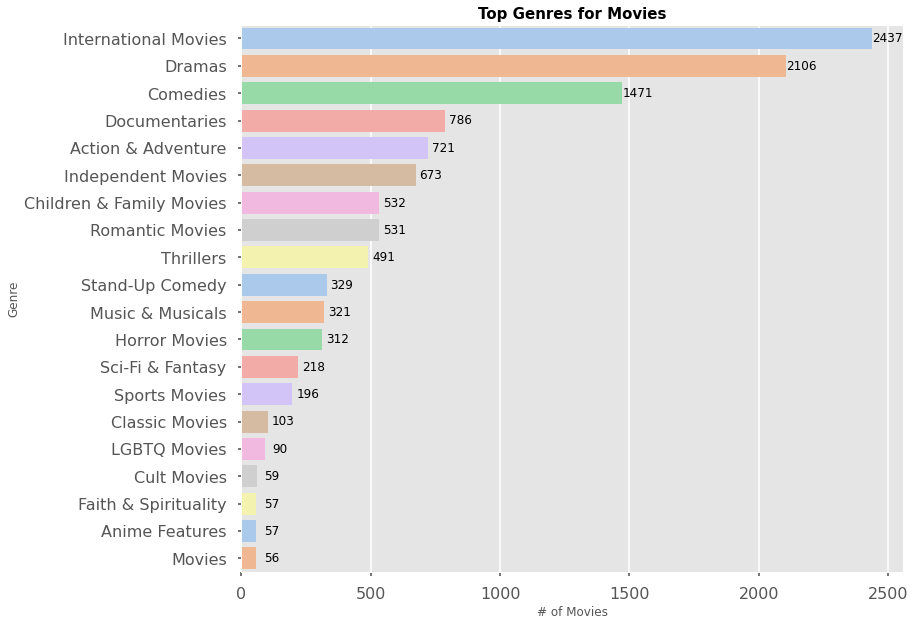

In [51]:
movies_top_genres = sns.barplot(data=movies_genres,x='count',y='genre',palette=palette[0:9])
for p in movies_top_genres.patches:
    movies_top_genres.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width()+60, p.get_y()+.4),ha='center',va='center',
                            color='black',fontsize=12)
plt.xlabel('# of Movies')
plt.ylabel('Genre')
plt.title('Top Genres for Movies',fontsize=15,fontweight='bold')
plt.tight_layout()

We can see that International Movies are the top Genre for movies by far, followed by dramas and comedy.

In [52]:
genres_dict = {}
tv_shows['listed_in'].apply(count_genres)

0       None
5       None
11      None
12      None
16      None
        ... 
7767    None
7775    None
7777    None
7779    None
7785    None
Name: listed_in, Length: 2400, dtype: object

In [53]:
genres_dict

{'International TV Shows': 1198,
 'TV Dramas': 703,
 'TV Sci-Fi & Fantasy': 75,
 'TV Mysteries': 90,
 'Crime TV Shows': 426,
 'Docuseries': 352,
 'Anime Series': 147,
 'Reality TV': 222,
 'TV Comedies': 518,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'British TV Shows': 231,
 'Korean TV Shows': 150,
 "Kids' TV": 412,
 'TV Action & Adventure': 149,
 'Spanish-Language TV Shows': 146,
 'TV Shows': 12,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'TV Thrillers': 50,
 'Classic & Cult TV': 25}

In [54]:
tv_genres = pd.DataFrame(genres_dict.values(),index=genres_dict.keys(),columns=['count'])
tv_genres = tv_genres.reset_index()
tv_genres.rename(columns={'index':'genre'},inplace=True)

In [55]:
tv_genres = tv_genres.sort_values('count',ascending=False)

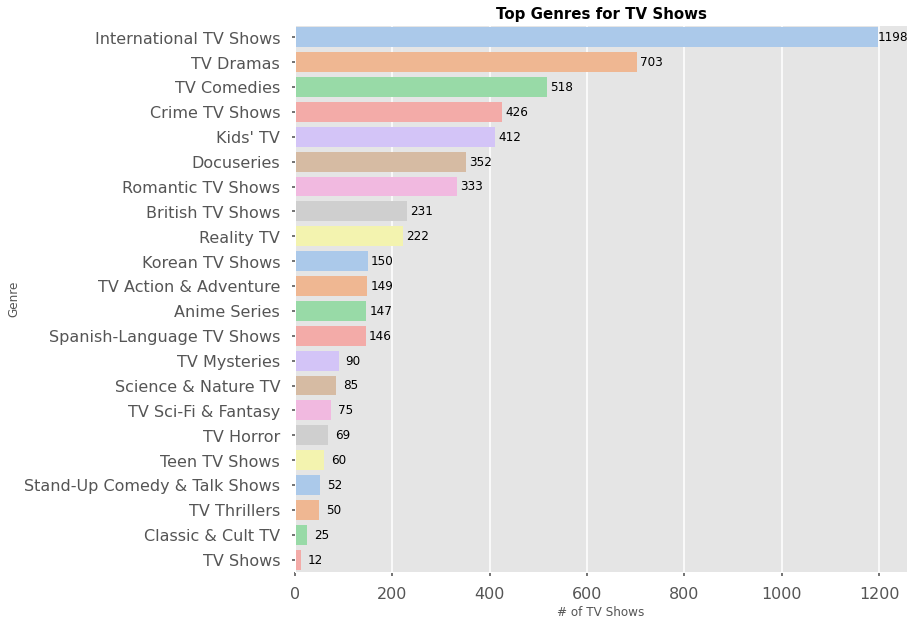

In [56]:
tv_shows_genres = sns.barplot(data=tv_genres,x='count',y='genre',palette=palette[0:9])
for p in tv_shows_genres.patches:
    tv_shows_genres.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width()+30, p.get_y()+.4),ha='center',va='center',
                            color='black',fontsize=12)
plt.xlabel('# of TV Shows')
plt.ylabel('Genre')
plt.title('Top Genres for TV Shows',fontsize=15,fontweight='bold')
plt.tight_layout()

We can see that in TV Shows as well International Shows are by far the most popular, followed by dramas and comedies. Similar to the movies distribution for the top 3 however with a much more distinctive lead for International.